In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import stats

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [6]:
df1=pd.read_csv(r'data\data_v2.csv')

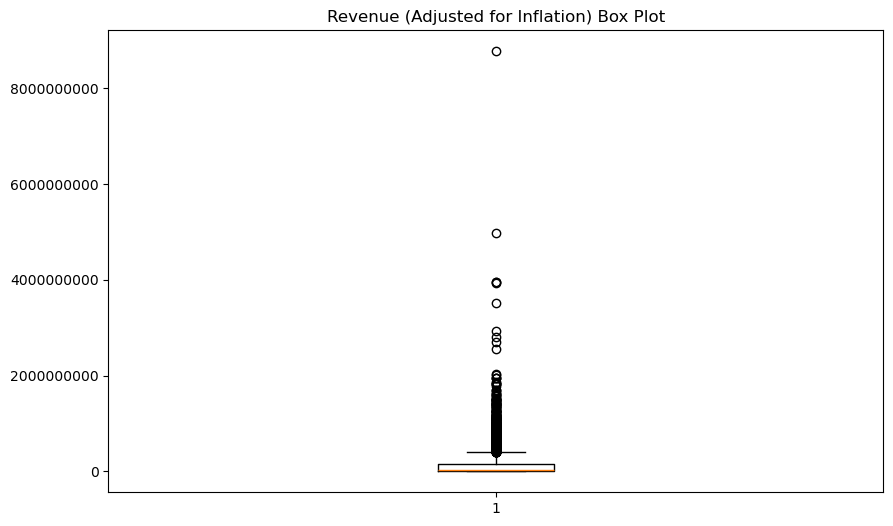

In [7]:
# find revenue outliers
plt.boxplot(df1['revenue_inflation_adjusted'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Revenue (Adjusted for Inflation) Box Plot')
plt.show()

In [8]:
# correlation between numeric values
cr=df1[['budget','revenue','vote_average','popularity','runtime','revenue_inflation_adjusted']].corr(method='pearson')

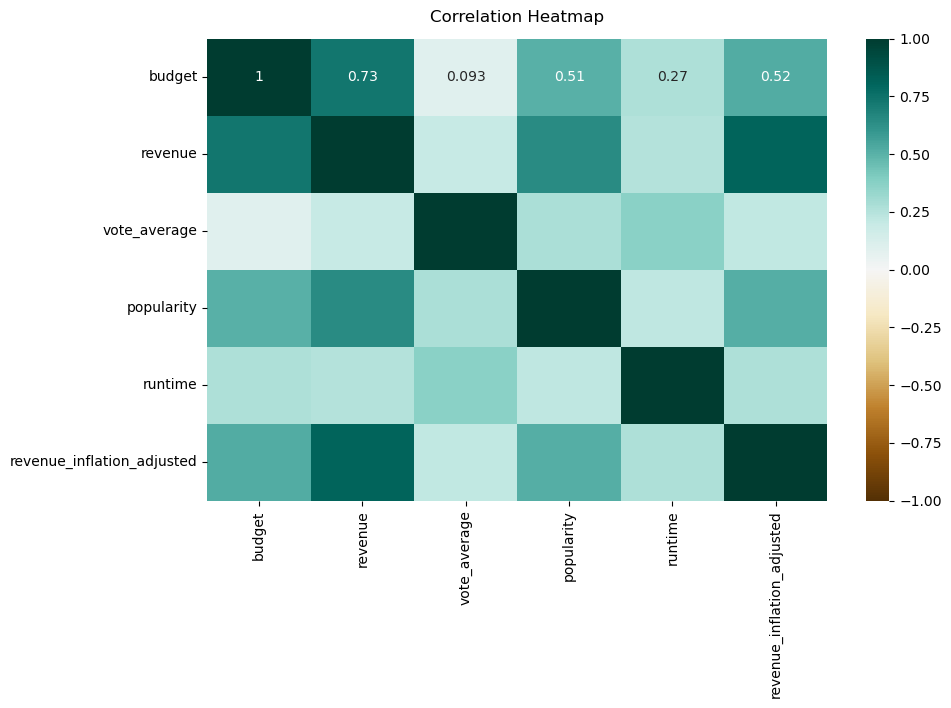

In [9]:
heatmap = sns.heatmap(cr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [19]:
# examining the Pearson coefficient
stats.pearsonr(df1['budget'],df1['revenue'])[0]

0.7308059539883839

In [20]:
stats.pearsonr(df1['popularity'],df1['revenue_inflation_adjusted'])[0]

0.5130405385035455

Text(0.5, 1.0, 'Reg Plot of Budget and Revenue')

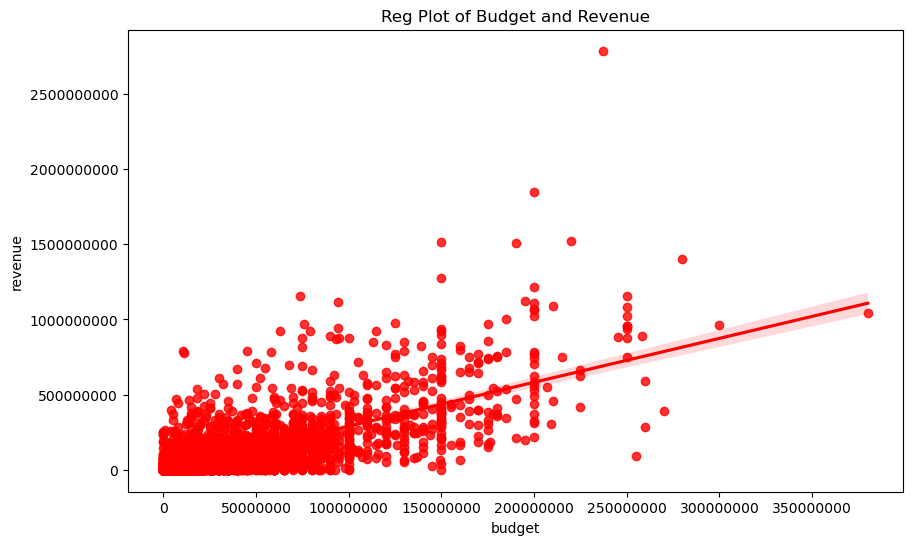

In [12]:
sns.regplot(df1,x='budget',y='revenue',color='red')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.title('Reg Plot of Budget and Revenue')

C:\Users\syast\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


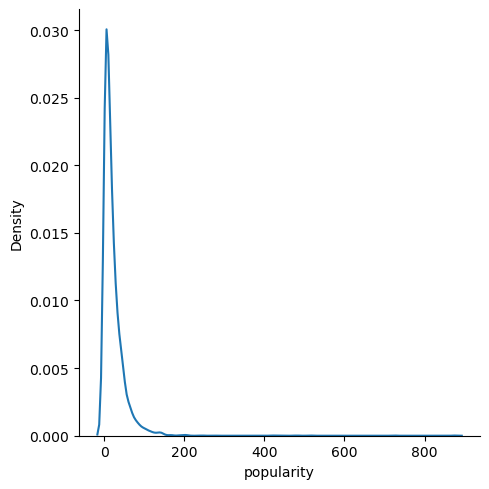

In [13]:
# investigate the popularity column
sns.displot(df1,x='popularity',kind='kde')

In [14]:
# creating a stripplot to show the revenue (adjusted for inflation) for movies in each popularity tier
df1['popularity'].describe()

count    4802.000000
mean       21.496776
std        31.818451
min         0.000372
25%         4.671734
50%        12.924931
75%        28.332017
max       875.581305
Name: popularity, dtype: float64

In [15]:
conditions=[(df1['popularity']<=4.671734),
           (df1['popularity']>4.671734) & (df1['popularity']<=12.924931),
           (df1['popularity']>12.924931) & (df1['popularity']<=28.332017),
            (df1['popularity']>28.332017)]

In [16]:
values=['low popularity','below average popularity','above average popularity','high popularity']

In [17]:
df1['pop_tier']=np.select(conditions,values)

C:\Users\syast\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\syast\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\syast\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


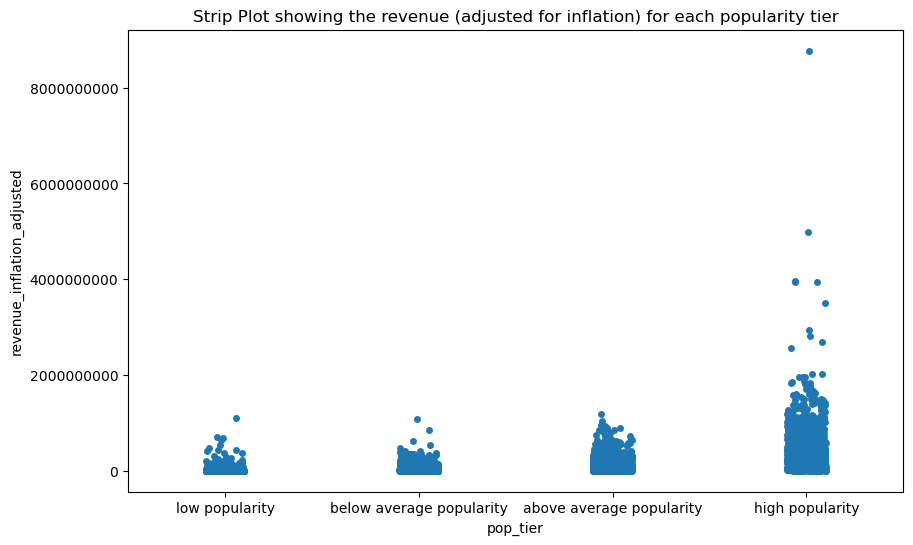

In [18]:
sns.stripplot(data=df1,x='pop_tier',y='revenue_inflation_adjusted', order=values)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Strip Plot showing the revenue (adjusted for inflation) for each popularity tier')
plt.show()